<a href="https://colab.research.google.com/github/ADRIANVM117/proyectos_propios/blob/main/hands_on_ml1/cap3_exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Try to build a classifer for the MNIST dataset that achieves over 97% accuracy on the test set. 

- Hint: the KNeighborsClassifier works quite weel for this task. you just need to find good hyperparameter

In [1]:
import pandas as pd
import numpy as np 
import os 





In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

we have to identify the target values and data, after we assigned them to X (for the features) and y (target variables)

In [3]:
X = mnist.data
y = mnist.target
y = y.astype(int) # The labels are strings but we want them to be integer


split the set into a train and test set.

In [4]:

# 1r option 
#X_train, X_test,y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 

# 2d option 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state= 42, stratify = y)

Now, we create a K-NN Classifier with n neighbors (clusters) we start with 9 cluster because we think it is correct since the MNIST set has only 9 characters.

In [5]:
from sklearn.neighbors import KNeighborsClassifier # import Kneighbors Classifier 

In [13]:
knn = KNeighborsClassifier(n_neighbors= 3) # create object classifier  

knn.fit(X_train,y_train) # fit the classifier 

KNeighborsClassifier(n_neighbors=3)

having fit a K-NN Classifier you can predict the label of a new data point.

In [14]:
y_pred = knn.predict(X_test)
print('Predctions {}'.format(y_pred))

Predctions [7 8 2 ... 4 6 4]


### Score 

In [15]:
print(knn.score(X_test, y_test))

0.9699047619047619


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9699047619047619

### Overfitting and Underfitting 

- we can construct a curve that ploting the training and testing accuracy scores for a variety of |different neighbor values. 

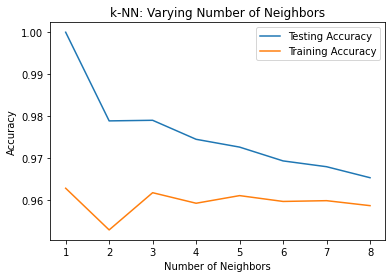

In [12]:
import matplotlib.pyplot as plt


# setup arrays to store train and test accuracies
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, j in enumerate(neighbors):
  # setup a K-NN with k neighbors
  knn = KNeighborsClassifier(n_neighbors= j)
  
  # fit the classifier to the training data
  knn.fit(X_train, y_train)
    # fit the classifier to the testing data
  knn.fit(X_test, y_test)

  # compute accuracy on training data 
  train_accuracy[i] = knn.score(X_train, y_train)
  test_accuracy[i] = knn.score(X_test, y_test)

  # Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()






# Titanic
## Model to predict wheter or no a person survives

In [94]:
test_set = pd.read_csv('/content/sample_data/test.csv')
train_set = pd.read_csv('/content/sample_data/train.csv')

In [55]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
train_set['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [96]:
train_set['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [59]:
train_set['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [60]:
train_set['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [61]:
train_set['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [98]:
train_set['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

- There are some columns that are not relevant for the Classifier like 
 'Name', 'PassengerId', 'Name', 'Parch', 	'Fare', 'Cabin'	

- ColumnTransformer() Class: transformer able to handle all columns, applying the appropiate transformations to each column. 

- around of 38% of people survived 
- the mean of age of people in titanic was around 30

### The goal 
####  we want to create a  Classifier to predict if a person survives or not 

In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn import svm, metrics 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [99]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
        ("imputer", SimpleImputer(strategy="median")),
    ])


In [101]:
# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [103]:
from sklearn.preprocessing import OneHotEncoder

In [104]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [105]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [107]:
X_train = preprocess_pipeline.fit_transform(train_set)
X_train

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [126]:
y_train = train_set["Survived"] # labels 

# SVM 

In [127]:
from sklearn.svm import SVC
svm_clf = SVC(gamma = 'auto')

svm_clf.fit(X_train, y_train)

SVC(gamma='auto')

In [129]:
X_test = preprocess_pipeline.fit_transform(test_set)

svm_clf.predict(X_test)

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [130]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.7329588014981274

the accuracy around 73 %. the model is not the best, we have to try with another 